***
#### About this document
- *This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006).*  
- *In this assignment, we have properly cited all the parts that reference the work of others. Additionally, we drew inspiration from the writing style of [Antonios Fiala](https://github.com/antoniosfiala/Electricity_clustering) and added table of contents markup in the Markdown text to improve the readability of the essay.*
- *The **data** I used comes from [here.](https://www.numbeo.com/quality-of-life/region_rankings.jsp?title=2023&region=150)*   
- *I have uploaded the **raw data** and the **source code** for this assignment to Github, which you can find [here.](https://github.com/zhuchunyunUCL/DSSS_coursework)*
***

# Exploration of Factors and Prediction Model for Urban Quality of Life Index: A Case Study in Europe

<a id="ID_Introduction"></a>
| [1. Introduction](#ID_Introduction) | [2. Literature Review](#ID_Literature_Review) | [3. Methods](#ID_Methods)  | [4. Presentation of Data and Data preprocessing](#ID_Presentation_of_Data_and_Data_preprocessing)| [5. Analysis](#ID_Analysis) | [6. Results and Discussion](#ID_Results_and_Discussion) | [7. Conclusion](#ID_Conclusion) | [Reference](#ID_Reference) | 

# 1. Introduction

With the acceleration of global urbanization, more and more people are living in cities. The quality of urban life is crucial to the health and well-being of residents, but it also faces many challenges. For example, urban traffic congestion and environmental problems may have a negative impact on the quality of urban life. Therefore, developing more accurate and comprehensive models for predicting urban quality of life indices and exploring influencing factors is essential for improving the quality of life of city residents.

Although many scholars have studied urban quality of life indices and influencing factors, traditional methods suffer from sample bias and subjectivity. Therefore, this essay will turn to data-driven methods, using multiple regression and machine learning algorithms to develop a more powerful model for predicting quality of life indices. Specifically, we aim to study the biggest factors influencing the quality of life index in European cities and to develop a model for predicting quality of life indices for European cities. By comparing the performance of different models in predicting quality of life indices, our research results can provide valuable insights for urban planning and policy-making, thereby improving the quality of life of city residents.

In section two of the article, I will interpret and summarize the research of other scholars on similar topics to clarify our research question. In section three, I will detail the methods used in my research, including how each method addresses specific issues. Section four will focus on the data, including data loading and processing, data visualization, and so on. In section five, I will present the main analysis, including a comparison of several methods. In section six, I will separately present my research results and engage in some discussions, concluding with a summary.

## 1.1 Requirements to run the analysis

In [1]:
#Used for data processing and analysis
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split#Splitting data

#Used for data visualization
import matplotlib.pyplot as plt#Plotting various types of graphs
import seaborn as sns#Advanced-level visualization package

#Used for statistical analysis
import statsmodels.api as sm#Multivariate regression
from statsmodels.stats.outliers_influence import variance_inflation_factor #Calculating variance inflation factor (VIF)
from statsmodels.tools.tools import add_constant#Fitting intercept term in VIF

#Used for machine learning
from sklearn.tree import DecisionTreeRegressor#CART
from sklearn.ensemble import RandomForestRegressor#RF
from xgboost import XGBRegressor#XGBoost
from sklearn.metrics import r2_score, mean_squared_error
import rfpimp#Feature importance analysis  
from sklearn.metrics import mean_squared_error#Calculating mean squared error of model predictions
from sklearn.model_selection import GridSearchCV#Finding the optimal combination of model parameters

<a id="ID_Literature_Review"></a>
| [1. Introduction](#ID_Introduction) | [2. Literature Review](#ID_Literature_Review) | [3. Methods](#ID_Methods)  | [4. Presentation of Data and Data preprocessing](#ID_Presentation_of_Data_and_Data_preprocessing)| [5. Analysis](#ID_Analysis) | [6. Results and Discussion](#ID_Results_and_Discussion) | [7. Conclusion](#ID_Conclusion) | [Reference](#ID_Reference) | 

# 2. Literature Review

In the research of urban life quality, many scholars attempt to use subjective methods for analysis. For example, some scholars (Das, 2008) evaluate the urban life quality index through citizen survey questionnaires. Some scholars (Ruta et al., 1994) deepen the survey questionnaire, adding aspects such as physical health and environmental conditions. In addition, some scholars (McGregor, Camfield and Woodcock, 2009) also consider factors such as participants' geographical and social backgrounds. Their research shows that physical health, environmental conditions, and social background have an important impact on the life quality of urban residents. For example, in cities with poor environmental quality, the life quality scores of the people are generally lower.

However, current research uses less statistical and machine learning methods to analyze and predict urban life quality. Therefore, this article will use multiple regression and three machine learning methods for analysis. It mainly addresses two issues: what is the most important factor affecting the life quality of European cities? Which model has better predictive ability?


<a id="ID_Methods"></a>
| [1. Introduction](#ID_Introduction) | [2. Literature Review](#ID_Literature_Review) | [3. Methods](#ID_Methods)  | [4. Presentation of Data and Data preprocessing](#ID_Presentation_of_Data_and_Data_preprocessing)| [5. Analysis](#ID_Analysis) | [6. Results and Discussion](#ID_Results_and_Discussion) | [7. Conclusion](#ID_Conclusion) | [Reference](#ID_Reference) | 

# 3. Methods

We will use multiple regression analysis and three machine learning methods: CART, Random Forest, and XGBoost.

**Multiple regression analysis**: We chose multiple regression because it is a powerful and commonly used method of data analysis. It can handle multiple independent variables, predict dependent variables and is easy to manipulate.

**Machine learning methods**: CART, Random Forest and XGBoost are commonly used machine learning algorithms that are based on decision trees and have high accuracy, strong predictive power and interpretability. So, we will use all three machine learning algorithms for our analysis and determine the best choice of model.

<a id="ID_Presentation_of_Data_and_Data_preprocessing"></a>
| [1. Introduction](#ID_Introduction) | [2. Literature Review](#ID_Literature_Review) | [3. Methods](#ID_Methods)  | [4. Presentation of Data and Data preprocessing](#ID_Presentation_of_Data_and_Data_preprocessing)| [5. Analysis](#ID_Analysis) | [6. Results and Discussion](#ID_Results_and_Discussion) | [7. Conclusion](#ID_Conclusion) | [Reference](#ID_Reference) | 

# 4. Data preprocessing and Presentation of Data  

In this chapter, we will introduce the dataset we used, which is the 2023 European Urban Quality of Life Index. It covers the Urban Quality of Life Index and potential factors that may affect the quality of urban life, such as Purchasing Power Index, Healthcare Index, Climate Index, etc. The purpose of this study is to identify the main factors influencing the European Urban Quality of Life Index and to develop a forecasting model to predict it accurately. To achieve this goal, we will use the Urban Quality of Life Index as the dependent variable and the rest as independent variables for data analysis.

## 4.1 Data Loading

In [2]:
#Read csv files
df = pd.read_csv('data/Europe.csv')
df.head()

,Rank,City,country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,1,Zurich,Switzerland,195.3,122.9,81.7,74.1,120.8,11.2,32.7,17.8,81.5
1,2,Zagreb,Croatia,156.6,56.5,77.6,63.5,51.0,14.2,32.0,33.5,82.2
2,3,Yekaterinburg,Russia,96.7,59.0,53.6,51.1,42.0,9.2,37.8,73.5,21.3
3,4,Wroclaw,Poland,135.0,60.3,73.7,56.7,41.1,12.5,34.5,61.3,78.4
4,5,Warsaw,Poland,134.6,62.6,73.9,59.8,44.0,14.4,35.2,59.6,74.6


## 4.2 Data processing and cleaning

Firstly, we use the `info()` function to check the basic information of the dataset, including data types, number of data points, missing values, etc. Based on the results, there are 88 rows and 12 columns in the data, with most of the data types being float64, a few being int64 and object. At the same time, we found that there were no missing values in the data, and the data integrity is good, which can be directly used for subsequent analysis.

In [3]:
#Information overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            88 non-null     int64  
 1   City                            88 non-null     object 
 2   country                         88 non-null     object 
 3   Quality of Life Index           88 non-null     float64
 4   Purchasing Power Index          88 non-null     float64
 5   Safety Index                    88 non-null     float64
 6   Health Care Index               88 non-null     float64
 7   Cost of Living Index            88 non-null     float64
 8   Property Price to Income Ratio  88 non-null     float64
 9   Traffic Commute Time Index      88 non-null     float64
 10  Pollution Index                 88 non-null     float64
 11  Climate Index                   88 non-null     float64
dtypes: float64(9), int64(1), object(2)
mem

In [4]:
#Number of null values
df.isnull().sum()

Rank                              0
City                              0
country                           0
Quality of Life Index             0
Purchasing Power Index            0
Safety Index                      0
Health Care Index                 0
Cost of Living Index              0
Property Price to Income Ratio    0
Traffic Commute Time Index        0
Pollution Index                   0
Climate Index                     0
dtype: int64

At the same time, considering the subsequent data analysis work, we should ensure that the column names of the data do not contain spaces. Therefore, we can use the rename() function to replace the column names that contain spaces with column names that do not contain spaces.

In [5]:
#Replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

#Output results
df.head()

,Rank,City,country,Quality_of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Cost_of_Living_Index,Property_Price_to_Income_Ratio,Traffic_Commute_Time_Index,Pollution_Index,Climate_Index
0,1,Zurich,Switzerland,195.3,122.9,81.7,74.1,120.8,11.2,32.7,17.8,81.5
1,2,Zagreb,Croatia,156.6,56.5,77.6,63.5,51.0,14.2,32.0,33.5,82.2
2,3,Yekaterinburg,Russia,96.7,59.0,53.6,51.1,42.0,9.2,37.8,73.5,21.3
3,4,Wroclaw,Poland,135.0,60.3,73.7,56.7,41.1,12.5,34.5,61.3,78.4
4,5,Warsaw,Poland,134.6,62.6,73.9,59.8,44.0,14.4,35.2,59.6,74.6


Since we will be using machine learning methods for data exploration in this article, which usually require numerical data, we need to delete unnecessary columns and split the data to make it compatible with machine learning methods.

In [6]:
#Delete unneeded columns
df_numb = df.drop(['City', 'country' ,'Rank'], axis=1)

In [7]:
#Split data
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(df_numb.drop(['Quality_of_Life_Index'], axis = 1), df_numb.Quality_of_Life_Index, random_state=random_state_split)

In [8]:
#Check the shapes of train and test 
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
#check the index of train_x and train_y
print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(66, 8)
(66,)
(22, 8)
(22,)
True
True


In [9]:
#Check data types
print(type(train_x))
print(type(train_y))
print(type(test_x))
print(type(test_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Finally, we obtained the dataset df_numb and split it into training and testing sets: train_x, test_x, train_y, and test_y.

In [10]:
df_numb.head()

,Quality_of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Cost_of_Living_Index,Property_Price_to_Income_Ratio,Traffic_Commute_Time_Index,Pollution_Index,Climate_Index
0,195.3,122.9,81.7,74.1,120.8,11.2,32.7,17.8,81.5
1,156.6,56.5,77.6,63.5,51.0,14.2,32.0,33.5,82.2
2,96.7,59.0,53.6,51.1,42.0,9.2,37.8,73.5,21.3
3,135.0,60.3,73.7,56.7,41.1,12.5,34.5,61.3,78.4
4,134.6,62.6,73.9,59.8,44.0,14.4,35.2,59.6,74.6


In [11]:
#View test and train data sizes
print("the number of rows in train data:", train_x.shape[0])
print("the number of rows in test data:", test_x.shape[0])

the number of rows in train data: 66
the number of rows in test data: 22


## 4.3 Descriptive statistics

#### **Summary Statistics**

We utilized the .describe() function to perform a descriptive statistical analysis on the data and stored the results in the variable "summary". Upon examination, we observed that the means and standard deviations of the variables did not differ significantly, indicating that the data was relatively evenly distributed. Standardization is typically employed when data has varying units of measurement or uneven distribution to facilitate better comprehension of feature differences by the model. Therefore, we believe that data standardization is unnecessary in this case.

Furthermore, examining the table provides clear insights into the statistical information for each variable. For instance, the mean of the life quality index in the dataset is 149.09, and the housing price to income ratio has the lowest mean value of only 12.25 among all variables, indicating that European residents may experience less financial pressure when it comes to purchasing houses, which may contribute to a higher quality of life. The climate index boasts the highest mean value among all variables, reaching 79.18.

In [12]:
#Summary Statistics
summary=df_numb.describe().round(2)  
summary

,Quality_of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Cost_of_Living_Index,Property_Price_to_Income_Ratio,Traffic_Commute_Time_Index,Pollution_Index,Climate_Index
count,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00
mean,149.09,73.05,62.25,66.88,56.24,12.25,32.14,45.69,79.18
std,29.43,26.56,10.95,10.24,17.48,3.65,6.26,18.33,13.48
min,82.70,30.10,37.40,48.00,24.50,5.60,16.10,13.40,16.10
25%,129.42,53.48,53.82,56.90,41.82,10.17,28.28,30.15,75.30
50%,152.20,65.50,62.65,69.45,55.35,11.70,31.65,45.15,82.40
75%,170.25,96.48,71.42,75.32,68.58,14.42,35.95,61.00,87.05
max,217.10,129.90,81.70,82.40,120.80,21.60,50.50,86.50,98.60


In [13]:
#transposes the table
summary=summary.T 
summary

,count,mean,std,min,25%,50%,75%,max
Quality_of_Life_Index,88.0,149.09,29.43,82.7,129.42,152.20,170.25,217.1
Purchasing_Power_Index,88.0,73.05,26.56,30.1,53.48,65.50,96.48,129.9
Safety_Index,88.0,62.25,10.95,37.4,53.82,62.65,71.42,81.7
Health_Care_Index,88.0,66.88,10.24,48.0,56.90,69.45,75.32,82.4
Cost_of_Living_Index,88.0,56.24,17.48,24.5,41.82,55.35,68.58,120.8
Property_Price_to_Income_Ratio,88.0,12.25,3.65,5.6,10.17,11.70,14.42,21.6
Traffic_Commute_Time_Index,88.0,32.14,6.26,16.1,28.28,31.65,35.95,50.5
Pollution_Index,88.0,45.69,18.33,13.4,30.15,45.15,61.00,86.5
Climate_Index,88.0,79.18,13.48,16.1,75.30,82.40,87.05,98.6


We visualize the dependent variable (city quality of life index) and find that among the thirty-odd countries in Europe, the city quality of life index varies. The index is highest in the Netherlands and lowest in Albania.

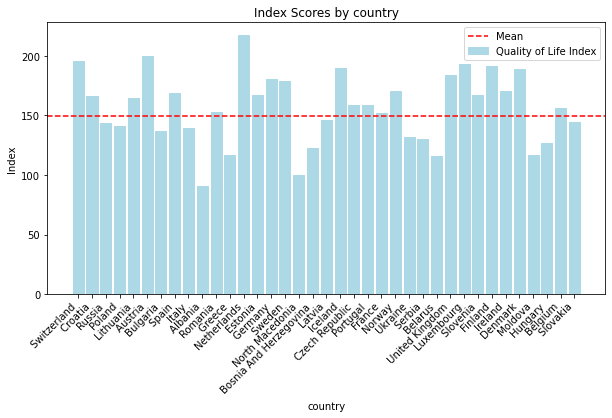

In [14]:
#Set the size of the chart
plt.figure(figsize=(10, 5))

#Calculate the mean
mean_QoL = df["Quality_of_Life_Index"].mean()

#Add a dashed line for the mean
plt.axhline(y=mean_QoL, color='r', linestyle='--')

#Draw a bar chart and set the bottom color and border color to light blue
plt.bar(df["country"], df["Quality_of_Life_Index"], color="lightblue", edgecolor="lightblue")

#Add a legend
plt.legend(["Mean", "Quality of Life Index"])

#Setting axis labels and titles
plt.xlabel("country")
plt.ylabel("Index")
plt.title("Index Scores by country")

#Set the rotation angle of the X-axis label to 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()


We also conducted visual exploratory data analysis on all variables to better understand their distribution and relationships.

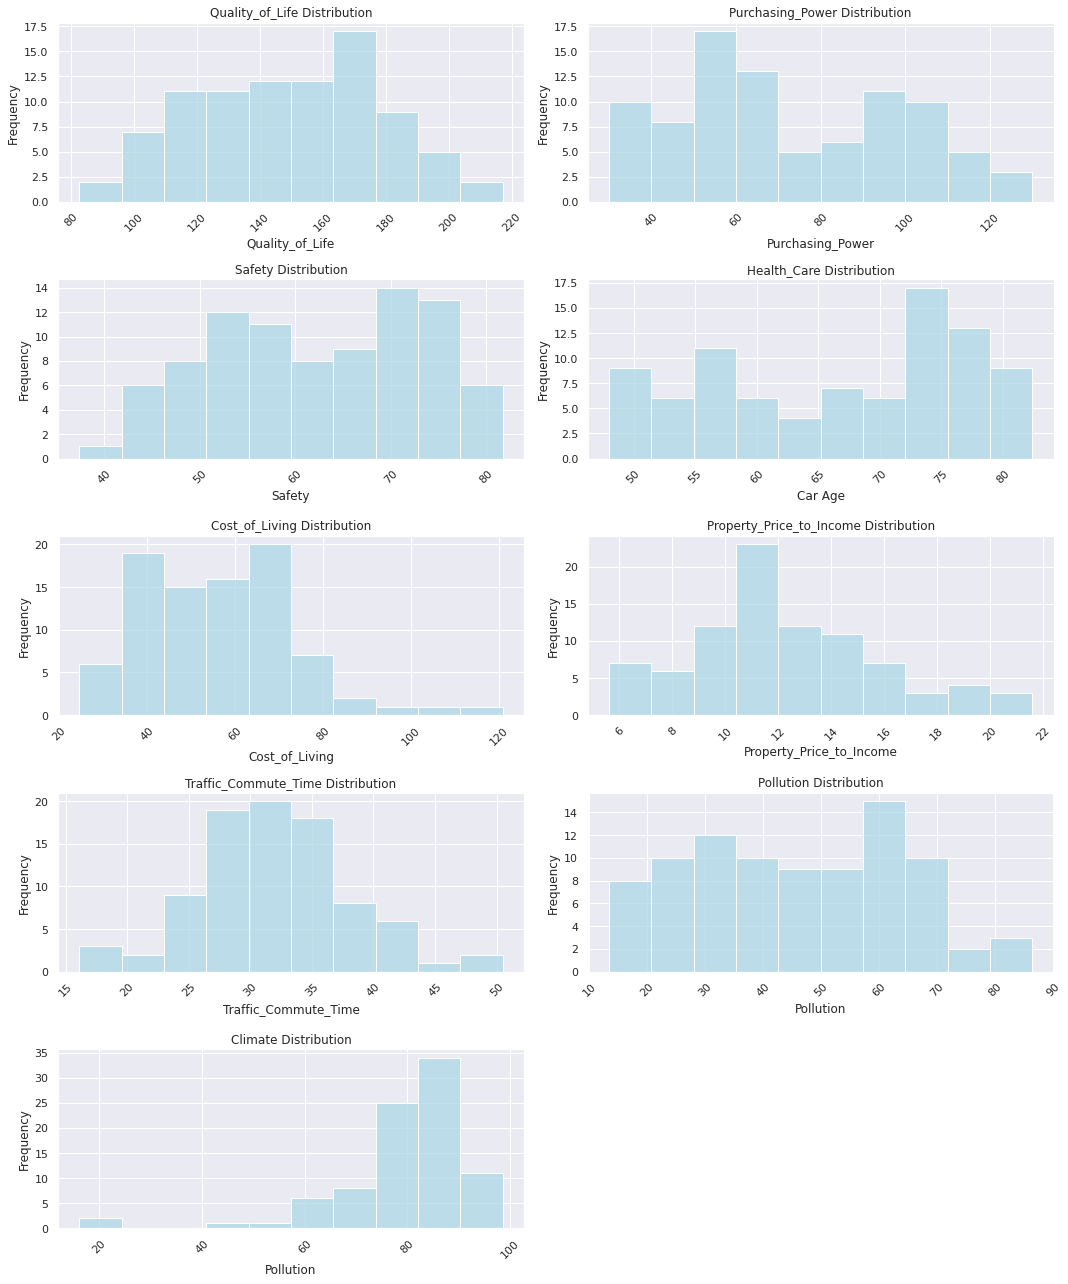

In [15]:
sns.set_style('darkgrid')
sns.set(font_scale=1)

fig, axs = plt.subplots(5, 2, figsize=(15, 18))

#Quality_of_Life
sns.histplot(data=df_numb, x='Quality_of_Life_Index', bins=10, ax=axs[0, 0], color="lightblue")
axs[0, 0].set_title('Quality_of_Life Distribution')
axs[0, 0].set_xlabel('Quality_of_Life')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].tick_params(axis='x', labelrotation=45)

#Purchasing_Power
sns.histplot(data=df_numb, x='Purchasing_Power_Index', bins=10, ax=axs[0, 1], color="lightblue")
axs[0, 1].set_title('Purchasing_Power Distribution')
axs[0, 1].set_xlabel('Purchasing_Power')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].tick_params(axis='x', labelrotation=45)

#Safety
sns.histplot(data=df_numb, x='Safety_Index', bins=10, ax=axs[1, 0], color="lightblue")
axs[1, 0].set_title('Safety Distribution')
axs[1, 0].set_xlabel('Safety')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].tick_params(axis='x', labelrotation=45)

#Health_Care
sns.histplot(data=df_numb, x='Health_Care_Index', bins=10, ax=axs[1, 1], color="lightblue")
axs[1, 1].set_title('Health_Care Distribution')
axs[1, 1].set_xlabel('Car Age')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].tick_params(axis='x', labelrotation=45)

#Cost_of_Living
sns.histplot(data=df_numb, x='Cost_of_Living_Index', bins=10, ax=axs[2, 0], color="lightblue")
axs[2, 0].set_title('Cost_of_Living Distribution')
axs[2, 0].set_xlabel('Cost_of_Living')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].tick_params(axis='x', labelrotation=45)

#Property_Price_to_Income
sns.histplot(data=df_numb, x='Property_Price_to_Income_Ratio', bins=10, ax=axs[2, 1], color="lightblue")
axs[2, 1].set_title('Property_Price_to_Income Distribution')
axs[2, 1].set_xlabel('Property_Price_to_Income')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].tick_params(axis='x', labelrotation=45)

#Traffic_Commute_Time
sns.histplot(data=df_numb, x='Traffic_Commute_Time_Index', bins=10, ax=axs[3, 0], color="lightblue")
axs[3, 0].set_title('Traffic_Commute_Time Distribution')
axs[3, 0].set_xlabel('Traffic_Commute_Time')
axs[3, 0].set_ylabel('Frequency')
axs[3, 0].tick_params(axis='x', labelrotation=45)

#Pollution
sns.histplot(data=df_numb, x='Pollution_Index', bins=10, ax=axs[3, 1], color="lightblue")
axs[3, 1].set_title('Pollution Distribution')
axs[3, 1].set_xlabel('Pollution')
axs[3, 1].set_ylabel('Frequency')
axs[3, 1].tick_params(axis='x', labelrotation=45)

#Climate
sns.histplot(data=df_numb, x='Climate_Index', bins=10, ax=axs[4, 0], color="lightblue")
axs[4, 0].set_title('Climate Distribution')
axs[4, 0].set_xlabel('Pollution')
axs[4, 0].set_ylabel('Frequency')
axs[4, 0].tick_params(axis='x', labelrotation=45)

axs[4, 1].remove()

plt.tight_layout()
plt.show()

Scatter plots reveal that some independent variables increase as the value of X increases, while others decrease. This indicates the presence of either positive or negative correlations between the variables.

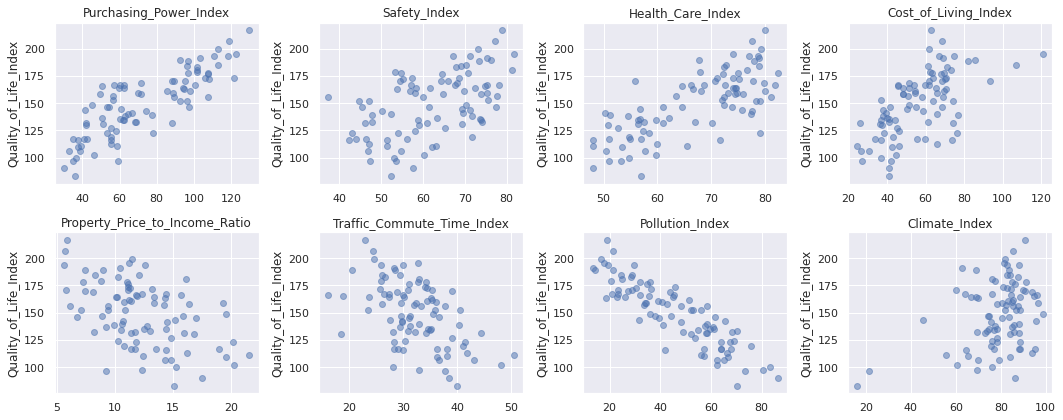

In [16]:
sns.set_style('darkgrid')
sns.set(font_scale=1)

#Set the Quality_of_Life_Index column as the y variable
y = df_numb['Quality_of_Life_Index']

#Set the other columns as the x variables
x_columns = ['Purchasing_Power_Index', 'Safety_Index', 'Health_Care_Index', 'Cost_of_Living_Index',
            'Property_Price_to_Income_Ratio', 'Traffic_Commute_Time_Index', 'Pollution_Index', 'Climate_Index']

#subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

#Add the scatter plot of each x variable to the subplots
for i, ax in enumerate(axs.flatten()):
    x = df_numb[x_columns[i]]
    ax.scatter(x, y, alpha=0.5)
    ax.set_title(x_columns[i])
    ax.set_ylabel('Quality_of_Life_Index')
    ax.grid(True)

fig.tight_layout()

plt.show()


#### **Correlation analysis**

We explore the interplay between variables by analyzing the correlation matrix. The colors in the matrix indicate the strength and direction of the relationship between variables. A red color represents a positive correlation, while blue indicates a negative correlation. The darker the color, the stronger the correlation.

By taking the city quality of life index as the dependent variable and the rest as independent variables, we observe that the absolute values of the correlation coefficients for all independent variables are greater than 0.3, indicating that they are all somewhat related. The most strongly correlated variable is the pollution index, followed by the purchasing power index.Therefore, we will select all of these variables.

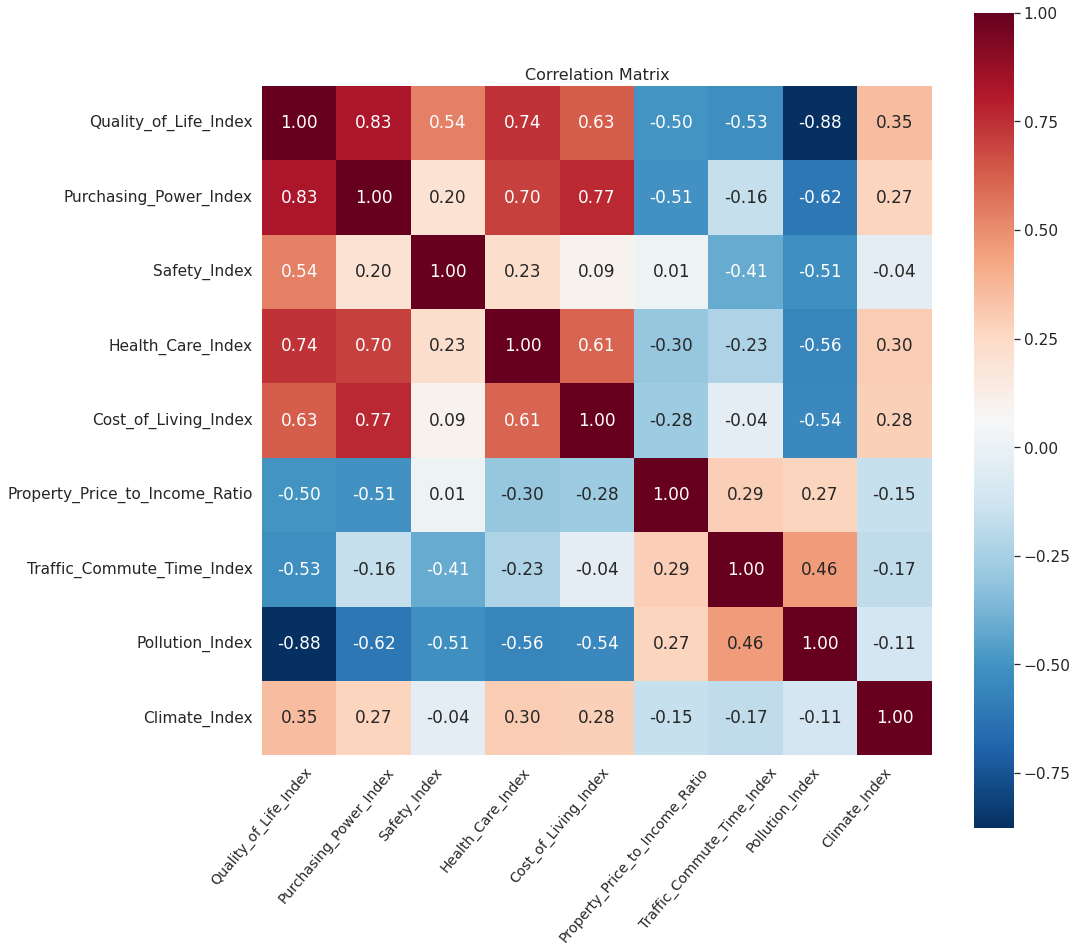

In [17]:
#Correlation matrix
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.4)
sns.heatmap(df_numb.corr(), annot=True, cmap="RdBu_r", square=True, fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(range(df_numb.shape[1]), df_numb.columns, fontsize=14, rotation=50)
plt.show()

<a id="ID_Analysis"></a>
| [1. Introduction](#ID_Introduction) | [2. Literature Review](#ID_Literature_Review) | [3. Methods](#ID_Methods)  | [4. Presentation of Data and Data preprocessing](#ID_Presentation_of_Data_and_Data_preprocessing)| [5. Analysis](#ID_Analysis) | [6. Results and Discussion](#ID_Results_and_Discussion) | [7. Conclusion](#ID_Conclusion) | [Reference](#ID_Reference) | 

# 5. Analysis

#### **Excluding multicollinearity with VIF**

To ensure the accuracy and stability of the model, the VIF method was used to identify independent variables with a high degree of multicollinearity in the data and to remove them before conducting the multiple regression analysis.

In [18]:
#Define a function to automatically drop independent variables with high collinearity

def drop_column_using_vif_(df_numb, thresh=5):
    #Add a constant term
    df_with_const = add_constant(df_numb)
    #Calculate the VIF value for each independent variable
    vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
           for i in range(df_with_const.shape[1])], name= "VIF", index=df_with_const.columns).to_frame()
    #Drop the constant column
    vif_df = vif_df.drop('const')
    #If the maximum VIF value is greater than the threshold, drop the independent variable with the highest VIF
    while vif_df.VIF.max() > thresh:
        index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
        print('Dropping: {}'.format(index_to_drop))
        df_numb = df_numb.drop(columns = index_to_drop)
        #Recalculate the VIF values
        df_with_const = add_constant(df_numb)
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF", index=df_with_const.columns).to_frame().drop('const')
    #Return the processed data
    return df_numb

In [19]:
#Check original columns
df_numb.columns

Index(['Quality_of_Life_Index', 'Purchasing_Power_Index', 'Safety_Index',
       'Health_Care_Index', 'Cost_of_Living_Index',
       'Property_Price_to_Income_Ratio', 'Traffic_Commute_Time_Index',
       'Pollution_Index', 'Climate_Index'],
      dtype='object')

In [20]:
#VIF
df_numb_predictors_selected_VIF = drop_column_using_vif_(df_numb.drop('Quality_of_Life_Index', axis=1))
print("The columns remaining after VIF selection are:")
print(df_numb_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['Purchasing_Power_Index', 'Safety_Index', 'Health_Care_Index',
       'Cost_of_Living_Index', 'Property_Price_to_Income_Ratio',
       'Traffic_Commute_Time_Index', 'Pollution_Index', 'Climate_Index'],
      dtype='object')


The result shows that there is no multicollinearity among our variables. Therefore, they can be used as independent variables for the following data analysis.

#### **Multiple regression analysis**

Multiple regression with "Quality_of_Life_Index" as dependent variable and remaining variables as independent. Used OLS for analysis.

In [21]:
#Build a regression model using all independent variables
model_ols = sm.formula.ols('Quality_of_Life_Index ~ Purchasing_Power_Index + Pollution_Index + Safety_Index + Health_Care_Index + Cost_of_Living_Index + Property_Price_to_Income_Ratio + Traffic_Commute_Time_Index + Climate_Index', df_numb).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Quality_of_Life_Index   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 4.620e+06
Date:                   Thu, 06 Apr 2023   Prob (F-statistic):          1.27e-220
Time:                           00:24:13   Log-Likelihood:                 152.48
No. Observations:                     88   AIC:                            -287.0
Df Residuals:                         79   BIC:                            -264.7
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         99.8863      0.077   1294.987      0.000      99.733     100.040
Purchasing_Power_Index             0.4003      0.000   1047.384      0.000       0.400       0.401
Pollution_Index                   -0.6667      0.000  -1530.838      0.000      -0.668      -0.666
Safety_Index                       0.5008      0.001    896.542      0.000       0.500       0.502
Health_Care_Index                  0.4004      0.001    572.483      0.000       0.399       0.402
Cost_of_Living_Index              -0.1005      0.000   -213.732      0.000      -0.101      -0.100
Property_Price_to_Income_Ratio    -1.0001      0.002   -590.395      0.000      -1.003      -0.997
Traffic_Commute_Time_Index        -0.4986      0.001   -494.592      0.000      -0.501      -0.497
Climate_Index                      0.3333      0.000    844.870      0.000       0.333       0.334
==============================================================================
Omnibus:                        1.926   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.381
Skew:                           0.032   Prob(JB):                        0.501
Kurtosis:                       2.390   Cond. No.                     2.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After examining our results, we found that the R² value was 1.0, indicating a perfect fit of the model to the data. We then looked at the "P>|t|" and "coef" values and found that the "P>|t|" results for all independent variables were very small, indicating that these variables have a statistically significant impact on the dependent variable. In addition, we can see that the "coef" values have both positive and negative values, indicating both positive and negative correlations. Our regression equation is as follows:

$$Quality of Life= 0.4003*Purchasing_Power - 0.6667*Pollution + 0.5008*Safety + 0.4004*Health - 0.1005*Licingcost -1.0001*PropertyPrice - 0.4986*Traffic +0.3333*Climate +99.8863 $$

To understand the predictive performance of the dataset in machine learning methods, in the following steps, we will use three different machine learning methods separately.

#### **CART**

First, we utilized CART to analyze the dataset. To optimize the performance of the model, we employed GridSearchCV to adjust hyperparameters. Next, we checked the model performance using the `.score()` function and `mean_squared_error()` function. Finally, we obtained feature importances using the `.importances()` function.

In [22]:
#get default values
cart_default = DecisionTreeRegressor(random_state=0)          
cart_default.fit(train_x, train_y)                           
print("Tree depth: {}".format(cart_default.get_depth()))       

Tree depth: 9


In [23]:
#Define hyperparameters
hyperparameters = {'max_depth':[5,10,15,20,25], 'min_samples_split':[2,4,6,8,10]}

#Build a decision tree regression model
randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)

#Select the best hyperparameter combination using GridSearchCV
clf = GridSearchCV(dt, hyperparameters)

#Training the model
clf.fit(train_x, train_y)

#Obtain the optimal hyperparameters
print ("The best parameter value is: ")
print (clf.best_params_)
#Obtain the accuracy score
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 2}
The best score is: 
0.7955330619029771


In [24]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=10, random_state=10000)

In [25]:
#R²
print("R2 on the training data:")
print(dt_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(dt_final.score(X=test_x, y=test_y))

R2 on the training data:
1.0
R2 on the testing data:
0.7779629670746673


In [26]:
#RMSE
print("RMSE on the training data:")
print(mean_squared_error(train_y, dt_final.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, dt_final.predict(test_x), squared=False))

RMSE on the training data:
0.0
RMSE on the testing data:
13.484148943380623


                                Importance
Feature                                   
Pollution_Index                   1.038572
Purchasing_Power_Index            0.559894
Safety_Index                      0.103106
Climate_Index                     0.037301
Health_Care_Index                 0.034545
Cost_of_Living_Index              0.010750
Traffic_Commute_Time_Index       -0.006544
Property_Price_to_Income_Ratio   -0.012761


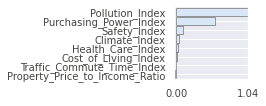

In [27]:
#Get feature importance
imp = rfpimp.importances(dt_final, test_x, test_y)
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

Our analysis showed that the model had a perfect R² score of 1.0 on the test data and an R² score of 0.78 on the training data. However, the lower R² score on the test data suggests overfitting, which means the model is too tailored to the training data and may not perform well on unseen data. The model's average deviation of 13.48 from the true quality of life index on the test data, as measured by the RMSE score, indicates relatively high prediction accuracy.

Furthermore, we found that the Pollution_Index, Purchasing_Power_Index, and Climate_Index were the three most important features, indicating that they have the greatest impact on quality of life.

#### **Random Forest**

Secondly, we use random forest to analyze the dataset, following the same steps as CART.

In [28]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[5,10,15,20,25], 'min_samples_split':[2,4,6,8,10]}

#Build a random forest regression model
randomState_dt = 10000
rf = RandomForestRegressor(random_state=randomState_dt)

#Select the best hyperparameter combination using GridSearchCV
clf = GridSearchCV(rf, hyperparameters)

#Training the model
clf.fit(train_x, train_y)

#Obtain the optimal hyperparameters
print ("The best parameter value is: ")
print (clf.best_params_)
#Obtain the accuracy score
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 15, 'min_samples_split': 2}
The best score is: 
0.888444912527562


In [29]:
rf_final = RandomForestRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
rf_final.fit(train_x, train_y)

RandomForestRegressor(max_depth=15, random_state=10000)

In [30]:
#R²
print("R2 on the training data:")
print(rf_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(rf_final.score(X=test_x, y=test_y))

R2 on the training data:
0.9864828441748317
R2 on the testing data:
0.8969407172644034


In [31]:
#RMSE
print("RMSE on the training data:")
print(mean_squared_error(train_y, rf_final.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, rf_final.predict(test_x), squared=False))

RMSE on the training data:
3.423700467905957
RMSE on the testing data:
9.186591206753478


                                Importance
Feature                                   
Pollution_Index                   0.455940
Purchasing_Power_Index            0.241707
Health_Care_Index                 0.038579
Traffic_Commute_Time_Index        0.028033
Property_Price_to_Income_Ratio    0.020172
Climate_Index                     0.007726
Cost_of_Living_Index              0.005879
Safety_Index                      0.001650


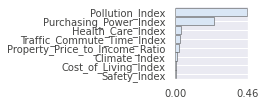

In [32]:
#Get feature importance
imp = rfpimp.importances(rf_final, test_x, test_y)
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

Our model has a good predictive performance, with an R² score of 0.98 for test data and 0.89 for training data. However, there might be overfitting issues. The top three important features are Pollution_Index, Purchasing_Power_Index, and Health_Care_Index, which is consistent with the CART analysis.

#### **XGBoost**

Thirdly, we use XGBoost to analyze the dataset, and the specific steps are consistent with CART. This will ensure that we can compare and analyze the results of the three different models.

In [33]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'n_estimators':[50,100,150,200,250]}

#Build an XGBoost regression model
randomState_xgb = 125
xgb = XGBRegressor(random_state=randomState_xgb)

#Select the best hyperparameter combination using GridSearchCV
gscv_xgb = GridSearchCV(xgb, hyperparameters)

#Training the model
gscv_xgb.fit(train_x, train_y)

#Obtain the optimal hyperparameters
print ("The best parameter value is: ")
print (gscv_xgb.best_params_)
#Obtain the accuracy score
print ("The best score is: ")
print (gscv_xgb.best_score_)

The best parameter value is: 
{'max_depth': 10, 'n_estimators': 100}
The best score is: 
0.876470801872747


In [34]:
xgb_final = XGBRegressor(max_depth=gscv_xgb.best_params_['max_depth'], n_estimators=gscv_xgb.best_params_['n_estimators'], random_state=randomState_xgb)
xgb_final.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=125,
             reg_alpha=0, reg_lambda=1, ...)

In [35]:
#R²
print("R2 on the training data:")
print(xgb_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(xgb_final.score(X=test_x, y=test_y))

R2 on the training data:
0.9999999996340065
R2 on the testing data:
0.9387577702719365


In [36]:
#RMSE
print("RMSE on the training data:")
print(mean_squared_error(train_y, xgb_final.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, xgb_final.predict(test_x), squared=False))

RMSE on the training data:
0.0005633648795303342
RMSE on the testing data:
7.081680523903789


                                Importance
Feature                                   
Purchasing_Power_Index            0.475907
Pollution_Index                   0.150388
Climate_Index                     0.079636
Safety_Index                      0.077345
Health_Care_Index                 0.067889
Property_Price_to_Income_Ratio    0.058118
Traffic_Commute_Time_Index        0.023243
Cost_of_Living_Index             -0.001286


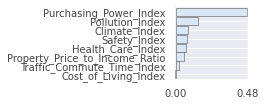

In [37]:
#Get feature importance
imp = rfpimp.importances(xgb_final, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

The XGBoost model outperformed the other two with a high R² score of 0.99 on the test dataset and a relatively lower R² score of 0.93 on the training dataset. The RMSE score also indicates strong predictive ability. The top three important features remain the same as the previous models: Purchasing_Power_Index, Pollution_Index, and Climate_Index.

#### **Model Performance Comparison**

The table and visualization below show a comparison of the results from the three machine learning models. This analysis can help us understand the strengths and weaknesses of each model and their ability to predict the quality of life index.

In [38]:
##Model performance comparison

# allow the entire column to be displayed without truncation
pd.options.display.max_colwidth = 1000  

#create a list of models
list_name_models = ['CART', 'RF', 'XGBoost']
#use the models from above
list_reg_models = [dt_final, rf_final, xgb_final]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    
    if name == 'CART':
        feature_importance = ['Pollution_Index', 'Purchasing_Power_Index', 'Climate_Index']
    elif name == 'RF':
        feature_importance = ['Pollution_Index', 'Purchasing_Power_Index', 'Health_Care_Index']
    elif name == 'XGBoost':
        feature_importance = ['Purchasing_Power_Index', 'Pollution_Index', 'Climate_Index']
        
    dict_models[name] = [r2_score(train_y, train_pred), r2_score(test_y, test_pred), r2_score(train_y, train_pred) - r2_score(test_y, test_pred),
                         mean_squared_error(train_y, train_pred, squared=False), mean_squared_error(test_y, test_pred, squared=False),
                         feature_importance]

#transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff', 'RMSE_train_data', 'RMSE_test_data', 'Feature_Importance(top 3)'])

display(df_models)  


,R2_train_data,R2_test_data,R2_diff,RMSE_train_data,RMSE_test_data,Feature_Importance(top 3)
CART,1.000000,0.777963,0.222037,0.000000,13.484149,"[Pollution_Index, Purchasing_Power_Index, Climate_Index]"
RF,0.986483,0.896941,0.089542,3.423700,9.186591,"[Pollution_Index, Purchasing_Power_Index, Health_Care_Index]"
XGBoost,1.000000,0.938758,0.061242,0.000563,7.081681,"[Purchasing_Power_Index, Pollution_Index, Climate_Index]"


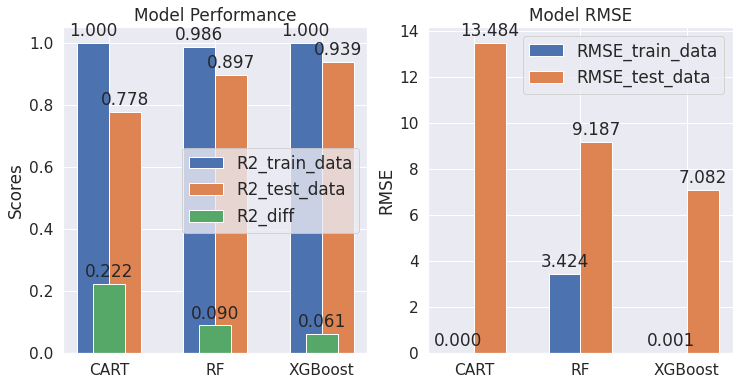

In [39]:
##Visualization results

#Create a bar chart
models = ['CART', 'RF', 'XGBoost']
train_scores = [1.0, 0.986483, 1.0]
test_scores = [0.777963, 0.896941, 0.938758]
score_diffs = [0.222037, 0.089542, 0.061242]
rmse_train = [0.0, 3.423700, 0.000563]
rmse_test = [13.484149, 9.186591, 7.081681]
x = np.arange(len(models))
width = 0.3

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
rects1 = ax1.bar(x - width/2, train_scores, width, label='R2_train_data')
rects2 = ax1.bar(x + width/2, test_scores, width, label='R2_test_data')
rects3 = ax1.bar(x, score_diffs, width, label='R2_diff')
rects4 = ax2.bar(x - width/2, rmse_train, width, label='RMSE_train_data')
rects5 = ax2.bar(x + width/2, rmse_test, width, label='RMSE_test_data')

#Set legend and labels for the left-side plot
ax1.set_ylabel('Scores')
ax1.set_title('Model Performance')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='center right', fontsize='medium')

#Add value labels to the left-side plot
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

#Set legend and labels for the right-side plot
ax2.set_ylabel('RMSE')
ax2.set_title('Model RMSE')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend(loc='upper right', fontsize='medium')

# Add value labels to the right-side plot
def autolabel2(rects):
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel2(rects4)
autolabel2(rects5)

plt.show()


<a id="ID_ID_Results_and_Discussion"></a>
| [1. Introduction](#ID_Introduction) | [2. Literature Review](#ID_Literature_Review) | [3. Methods](#ID_Methods)  | [4. Presentation of Data and Data preprocessing](#ID_Presentation_of_Data_and_Data_preprocessing)| [5. Analysis](#ID_Analysis) | [6. Results and Discussion](#ID_Results_and_Discussion) | [7. Conclusion](#ID_Conclusion) | [Reference](#ID_Reference) | 

# 6. Results and Discussion

We compared the results of the multivariate regression method and three machine learning methods, and found that the multivariate regression method performed well on this dataset (R²=1), while the three machine learning methods showed overfitting. However, XGBoost performed well on the test data, with an R² of 0.94, and the performances of CART and RF were also similar. Therefore, when predicting this dataset, the multivariate regression method may be a more suitable choice, but machine learning methods can also be considered, especially XGBoost. The top three important features obtained by the three machine learning methods all included the "Pollution_Index" and "Purchasing_Power_Index", while the highest correlation coefficient in the multivariate regression was for "Pollution_Index". Therefore, we can conclude that "Pollution_Index" may have the greatest impact on the quality of life in cities.

This essay effectively supplements the shortcomings of current literature on using machine learning to predict the quality of life in cities, and is consistent with the views of current relevant scholars that pollution index has a significant impact on the quality of life in cities.

However, there has some limitations. We did not make a series of important assumptions, including normality and heteroscedasticity, before conducting the multivariate regression. Additionally, we could attempt to use other techniques (such as Lasso) to optimize the model and further reduce overfitting.

<a id="ID_Conclusion"></a>
| [1. Introduction](#ID_Introduction) | [2. Literature Review](#ID_Literature_Review) | [3. Methods](#ID_Methods)  | [4. Presentation of Data and Data preprocessing](#ID_Presentation_of_Data_and_Data_preprocessing)| [5. Analysis](#ID_Analysis) | [6. Results and Discussion](#ID_Results_and_Discussion) | [7. Conclusion](#ID_Conclusion) | [Reference](#ID_Reference) | 

# 7. Conclusion

In summary, this essay studied the urban life quality index using multiple regression and three machine learning methods. By comparing the predictive performance of different models, we mainly addressed two questions: "what is the most important factor affecting the life quality of European cities?" Our conclusion is that environmental pollution has the greatest impact on the urban life quality index. The second question is "which model has better predictive ability?" Our conclusion is that multiple regression may be the most suitable predictive model, but machine learning methods can also be considered, especially XGBoost.

Through this essay, we hope to help governments and urban planners allocate resources and formulate policies more effectively to improve the quality of life for city residents.

<a id="ID_Reference"></a>
| [1. Introduction](#ID_Introduction) | [2. Literature Review](#ID_Literature_Review) | [3. Methods](#ID_Methods)  | [4. Presentation of Data and Data preprocessing](#ID_Presentation_of_Data_and_Data_preprocessing)| [5. Analysis](#ID_Analysis) | [6. Results and Discussion](#ID_Results_and_Discussion) | [7. Conclusion](#ID_Conclusion) | [Reference](#ID_Reference) | 

# Reference

Das, D. (2008) ‘Urban Quality of Life: A Case Study of Guwahati’, Social Indicators Research, 88(2), pp. 297–310. Available at: https://doi.org/10.1007/s11205-007-9191-6.

McGregor, J.A., Camfield, L. and Woodcock, A. (2009) ‘Needs, Wants and Goals: Wellbeing, Quality of Life and Public Policy’, Applied Research in Quality of Life, 4(2), pp. 135–154. Available at: https://doi.org/10.1007/s11482-009-9069-7.

Ruta, D.A. et al. (1994) ‘A New Approach to the Measurement of Quality of Life: The Patient-Generated Index’, Medical Care, 32(11), pp. 1109–1126. Available at: https://doi.org/10.1097/00005650-199411000-00004.

